<h1 align="center">Take Home Assessment - 19477 - SOLON LICAS</h1>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import glob
import json
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt

%matplotlib inline
#conda install geopandas
#pip install descartes
import geopandas

I will be using the parking infraction data from 2016-2020

In [2]:
path = 'parking_data_2016_2020/'
all_files =glob.glob(path + '/*.csv')

In [3]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    


In [4]:
df =pd.concat(li, axis=0, ignore_index=True)

In [5]:
#replace the road names  to prevent being counted as diffeneent locations

df['location2'].replace('AVE','AV',inplace=True,regex=True)
df['location2'].replace('AVENUE','AV',inplace=True,regex=True)
df['location2'].replace('ROAD','RD',inplace=True,regex=True)
df['location2'].replace('DRIVE','DR',inplace=True,regex=True)
df['location2'].replace('STREET','ST',inplace=True,regex=True)

In [6]:
#add complete Address Column
df['complete_address']=df['location1'].fillna('')+' '+df['location2'].fillna('')+' '+df['location3'].fillna('')+' '+df['location4'].fillna('')
df['complete_address']=df['complete_address'].str.strip()


## 3.1.1 Top 20 ticket infractions (frequency) by Location 

In [7]:

#3.1.2 Top 20 Ticket Infractions (frequency) by Location year 2016-2020
top20_frequency = df.complete_address.value_counts().nlargest(20).sum()
top20_frequency


201309

## 3.1.2 Top 20 Ticket Infractions (revenue) by Location

In [8]:
#3.1.2 Top 20 Ticket Infractions (revenue) by Location year 2016-2020
top20_revenue = df.groupby('complete_address').sum().sort_values(by='set_fine_amount', ascending = False).nlargest(20,columns='set_fine_amount')
top20_revenue['set_fine_amount'].sum()

16591795

## 3.1.3 Total Revenue of all tickets

In [9]:
#3.1.3 Total Revenue of all tickets for 2016-2020
df['set_fine_amount'].sum()

495062260

## 3.1.4a Distance to closest parking lot for top 20 infractions

In [10]:
#Top 20 Ticket Infractions by Location by  Year 2016_2020
df['complete_address'].value_counts().head(20)
top20 = df['complete_address'].value_counts().head(20)
top20


2075 BAYVIEW AV            32416
AT 1265 MILITARY TRL       14141
NR 15 MARINE PARADE DR     13777
NR 20 EDWARD ST            13653
AT 103 THE QUEENSWAY       11874
AT 1000 FINCH AV W          9368
NR 273 BLOOR ST W           9287
AT 1 BRIMLEY RD S           8928
AT 250 FRONT ST E           8130
4001 LESLIE ST              8027
AT 155 LEGION RD N          7748
4700 KEELE ST               7697
3401 DUFFERIN ST            7566
OPP 150 GERRARD ST W        7506
NR 42 CHARLES ST E          7271
18 HENDON AV                6954
AT 5 VALHALLA INN RD        6932
NR 40 ORCHARD VIEW BLVD     6918
700 LAWRENCE AV W           6653
106 HUMBER COLLEGE BLVD     6463
Name: complete_address, dtype: int64

In [11]:
#By using GIS application (MapInfo), I extracted the coordinates for the top 20 infraction locations (by frequency)
#and load it to the notebook

top20_coordinates = pd.read_csv('Top20_locationInfraction_coordinates.csv')


In [12]:

#load json data format 
with open('green-p-parking-2019.json','r' )as f:
    data= json.loads(f.read())
    
# flatten data
greenP= pd.json_normalize(data, record_path=['carparks'])


In [13]:
#With the two tables (top20 coordinates and greenP), I will use GIS Application (Mapinfo) to compute nearest Parking lot
#And load the result to the notebook.

nearestParking =pd.read_csv('NearestDistance_toGreenP.csv')
nearestParking

,Top Infraction Location,Green P,DistanceKM
0,2075 BAYVIEW AV,2170 Bayview avenue,0.550206
1,AT 1265 MILITARY TRL,1530 Markham Road - minor capital repairs onsite,4.125400
2,NR 15 MARINE PARADE DR,15 Marine Parade Drive,0.238039
3,NR 20 EDWARD ST,20 Dundas Square,0.214824
4,AT 103 THE QUEENSWAY,2001 Lake Shore Blvd. West (Parks),0.284921
5,AT 1000 FINCH AV W,3950 Keele Street,1.903233
6,NR 273 BLOOR ST W,9 Bedford Road,0.138272
7,AT 1 BRIMLEY RD S,1 Brimley Road (Bluffer's Park),0.158906
8,AT 250 FRONT ST E,271 Front Street East,0.096698
9,4001 LESLIE ST,Leslie Lot - 2760 Old Leslie Street,0.343701


## 3.1.4.b Distance to closest TTC Stop  for top20 infractions 

In [14]:
#Use top 20 coordinates for infraction location
#By using GIS application (MapInfo), I extracted the coordinates for the top 20 infraction locations (by frequency)

top20_coordinates = pd.read_csv('Top20_locationInfraction_coordinates.csv')
#top20_coordinates

In [15]:
#Use TTC bus stop info and load.

stops = pd.read_csv('stops.txt')

In [16]:
#With the two dataframe (stops, top20_coordinates) 
#I will use GIS Application(Mapinfo) to compute the nearest stops and open it on jupyter notebook

nearestStops = pd.read_csv('NearestDistance_toStops.csv')
nearestStops

,Top Infraction Location,TTC Stops,DistanceKM
0,2075 BAYVIEW AV,Raab Blvd at Hospital Rd West Side (K & L Wings),0.249660
1,AT 1265 MILITARY TRL,Military Trail at University of Toronto Scarbo...,0.088381
2,NR 15 MARINE PARADE DR,Marine Parade Dr (East) at Lake Shore Blvd West,0.158227
3,NR 20 EDWARD ST,Dundas Station - Northbound Platform,0.076226
4,AT 103 THE QUEENSWAY,The Queensway at Windermere Ave,0.075229
5,AT 1000 FINCH AV W,Dufferin St at Finch Ave West,0.111438
6,NR 273 BLOOR ST W,Bloor St West at Bedford Rd,0.109477
7,AT 1 BRIMLEY RD S,Barkdene Hills at Larwood Blvd,0.848319
8,AT 250 FRONT ST E,King St East at Parliament St,0.061132
9,4001 LESLIE ST,North York General Hospital - Main Entrance,0.021878


## 3.1.5a Impact of day of week in all infractions

In [17]:
df['dateInfraction'] =pd.to_datetime(df['date_of_infraction'],format='%Y%m%d')
df['dayWeek']=df['dateInfraction'].dt.day_name()
df['month']=df['dateInfraction'].dt.month_name()
df['monthNum']=df['dateInfraction'].dt.month
df['year']=df['dateInfraction'].dt.year
df['quarter']=df['dateInfraction'].dt.quarter

df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,complete_address,dateInfraction,dayWeek,month,monthNum,year,quarter
0,***03850,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON,NR 49 GLOUCESTER ST,2016-01-01,Friday,January,1,2016,1
1,***03851,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON,NR 45 GLOUCESTER ST,2016-01-01,Friday,January,1,2016,1
2,***98221,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON,NR 274 GEORGE ST,2016-01-01,Friday,January,1,2016,1
3,***85499,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON,NR 270 GEORGE ST,2016-01-01,Friday,January,1,2016,1
4,***03852,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON,NR 45 GLOUCESTER ST,2016-01-01,Friday,January,1,2016,1


In [18]:
df.dayWeek.value_counts(ascending=False)

Tuesday      1606252
Wednesday    1604108
Thursday     1581613
Friday       1578438
Monday       1406875
Saturday     1271931
Sunday       1011660
Name: dayWeek, dtype: int64

## 3.1.5b Impact month in all infractions

In [19]:
df.month.value_counts().sort_values(ascending=False)

October      929849
September    900406
March        888157
January      884235
August       873447
November     870855
July         832834
February     798982
May          795061
June         778739
April        759052
December     749260
Name: month, dtype: int64

## 3.1.5c Impact of season in all infractions

In [20]:

seasons = {'January':'Winter', 'February':'Winter','March':'Spring','April':'Spring','May':'Spring','June':'Summer',
           'July':'Summer','August':'Summer','September':'Fall','October':'Fall','November':'Fall',
           'December':'Winter'}
df['Season'] = df['month'].apply(lambda x:seasons[x])


In [21]:
df.Season.value_counts().sort_values(ascending=False)

Fall      2701110
Summer    2485020
Spring    2442270
Winter    2432477
Name: Season, dtype: int64

## 3.3.1.a.i Distribution of infraction by year

Text(0, 0.5, 'Parking Infraction Count')

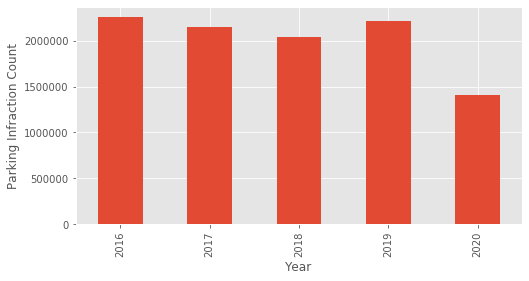

In [22]:

plt.style.use('ggplot')

ax=df.year.value_counts().sort_index().plot(kind='bar', figsize=(8,4))
ax.set_xlabel('Year');
ax.set_ylabel('Parking Infraction Count')

## 3.3.1.a.ii Distribution of infraction by month


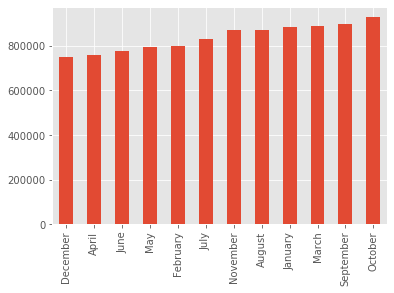

In [23]:
df.month.value_counts().sort_values().plot(kind='bar');

## 3.3.1.b Distribution of top 20 infraction by fines

In [24]:
top20_revenue = df.groupby('complete_address').sum().sort_values(by='set_fine_amount', ascending = False).nlargest(20,columns='set_fine_amount')

Text(0, 0.5, 'Total Fines')

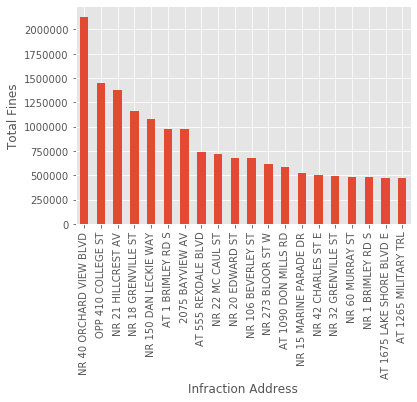

In [25]:
ax=top20_revenue.set_fine_amount.plot(kind='bar')
ax.set_xlabel('Infraction Address');
ax.set_ylabel('Total Fines')

## 3.3.2.a Geographic distribution (location) of top 20 infraction (count)

<function matplotlib.pyplot.show(*args, **kw)>

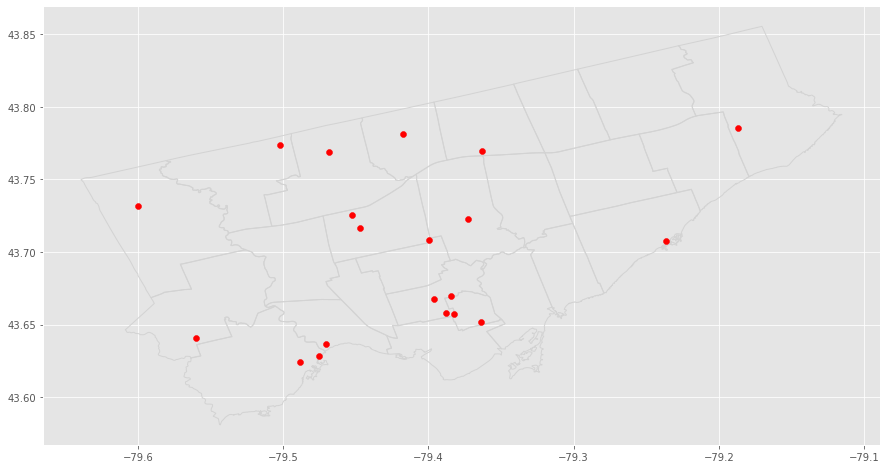

In [26]:
#top20_infraction distribution

ward = geopandas.read_file('25-ward-model-december-2018-wgs84-latitude-longitude/WARD_WGS84.shp')

top20Frequency=geopandas.GeoDataFrame(
top20_coordinates, geometry=geopandas.points_from_xy(top20_coordinates.longitude,top20_coordinates.latitude))

top20Frequency.crs={'init':'epsg:4326'}

ax=ward.plot(edgecolor='lightgrey',facecolor='none',linewidth=1,figsize=(15,10))
top20Frequency.plot(ax=ax, color='red')

plt.show

## 3.3.2.b Geographic Distribution by ward for top 20 infractions(count)

In [27]:
ward = geopandas.read_file('25-ward-model-december-2018-wgs84-latitude-longitude/WARD_WGS84.shp')


In [28]:
#Create Geodata Frame for top20 locations by frequency
top20Frequency=geopandas.GeoDataFrame(
top20_coordinates, geometry=geopandas.points_from_xy(top20_coordinates.longitude,top20_coordinates.latitude))


In [29]:
top20Frequency.crs is None

True

In [30]:
#Set crs projection
top20Frequency.crs={'init':'epsg:4326'}


<function matplotlib.pyplot.show(*args, **kw)>

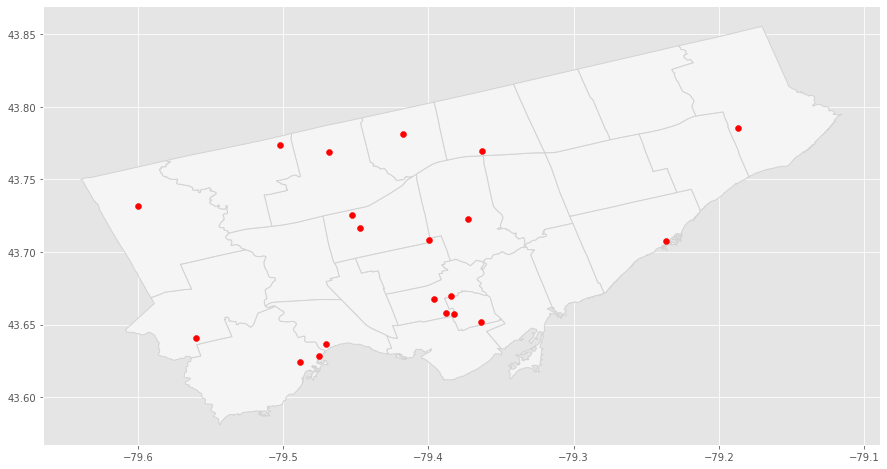

In [31]:
ax=ward.plot(edgecolor='lightgrey',facecolor='whitesmoke',linewidth=1,figsize=(15,10))
top20Frequency.plot(ax=ax, color='red')
#ax.set(xlim=(-20,60),ylim=(-40,40))
plt.show

#https://shotlefttodatascience.com/2018/05/16/adding-labels-to-districts-in-geopandas/
#https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb

In [32]:
joined = geopandas.sjoin(ward,top20Frequency,op='intersects',how='left')

#joined

In [33]:
joined=joined.dropna()

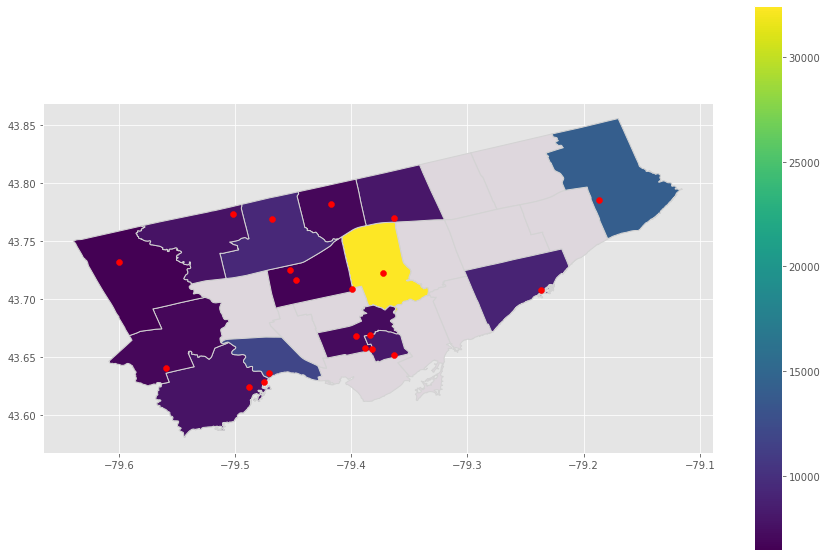

In [34]:
ax=ward.plot(edgecolor='lightgrey',facecolor='#ded7dd',linewidth=1,figsize=(15,10))
joined.plot(ax=ax,column='frequency',edgecolor='lightgrey',facecolor='#eb34db',linewidth=1,figsize=(15,10),legend=True,k=4)
top20Frequency.plot(ax=ax, color='red')

## 3.3.2.c Geographic Distribution by ward for top 20 infractions(revenue)

In [35]:
#using MApinfo to extract coordinates for top 20 by revenue, then load into notebook
top20_revenue_coordinates =pd.read_csv('Top20_locationInfraction_revenue_coordinates.csv')

In [36]:
#Create Geodata Frame for top20 locations by Revenue
top20Revenue=geopandas.GeoDataFrame(
top20_revenue_coordinates, geometry=geopandas.points_from_xy(top20_revenue_coordinates.longitude,top20_revenue_coordinates.latitude))




In [37]:
#Set crs projection
top20Revenue.crs={'init':'epsg:4326'}

<function matplotlib.pyplot.show(*args, **kw)>

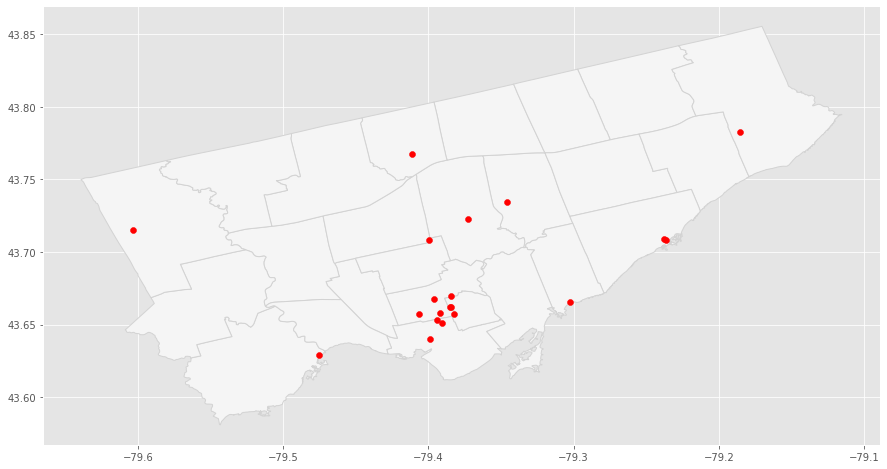

In [38]:
#View top 20 locations revenue against Ward boundaries
ax=ward.plot(edgecolor='lightgrey',facecolor='whitesmoke',linewidth=1,figsize=(15,10))
top20Revenue.plot(ax=ax, color='red')
#ax.set(xlim=(-20,60),ylim=(-40,40))
plt.show

In [39]:
joined = geopandas.sjoin(ward,top20Revenue,op='intersects',how='left')

#joined

In [40]:
joined=joined.dropna()

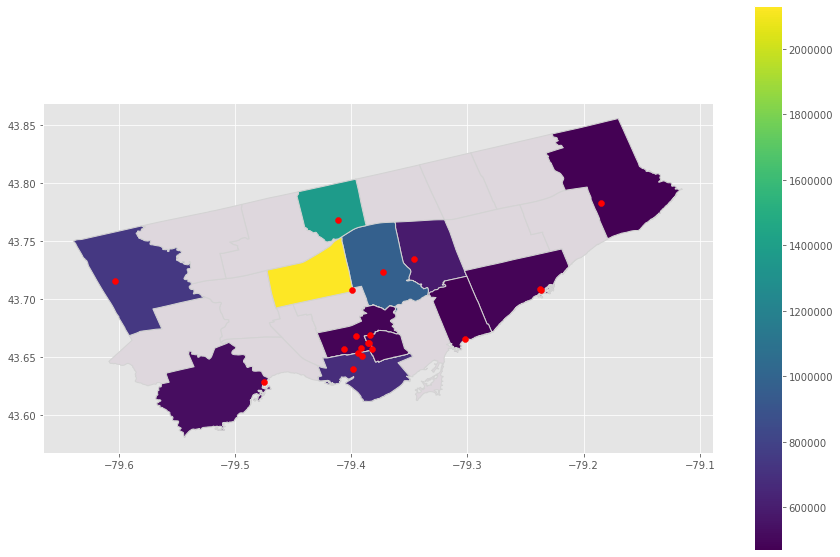

In [41]:
ax=ward.plot(edgecolor='lightgrey',facecolor='#ded7dd',linewidth=1,figsize=(15,10))
joined.plot(ax=ax,column='revenue',edgecolor='lightgrey',facecolor='#eb34db',linewidth=1,figsize=(15,10),legend=True,k=4)
top20Revenue.plot(ax=ax, color='red')

## 3.3.2.d Relevant observations in relation to socio economic profiles.

In [42]:
#open Neighbourhood Shapefile taken from Open Data Toronto
hood = geopandas.read_file('Neighbourhoods - 4326/Neighbourhoods.shp')


In [43]:
#rename column Field_17 to Hood
hood.rename(columns={'FIELD_17':'Hood'},inplace=True)
#hood.head()

In [44]:
#Open demographic data
demoList = pd.read_csv('demographics-nhs-indicators-2011.csv')
#demoList

In [45]:
#Merge the two tables : hood (Spatial) and demoList (table)
hoodDemo = hood.merge(demoList,on='Hood')

In [46]:
#hoodDemo.columns

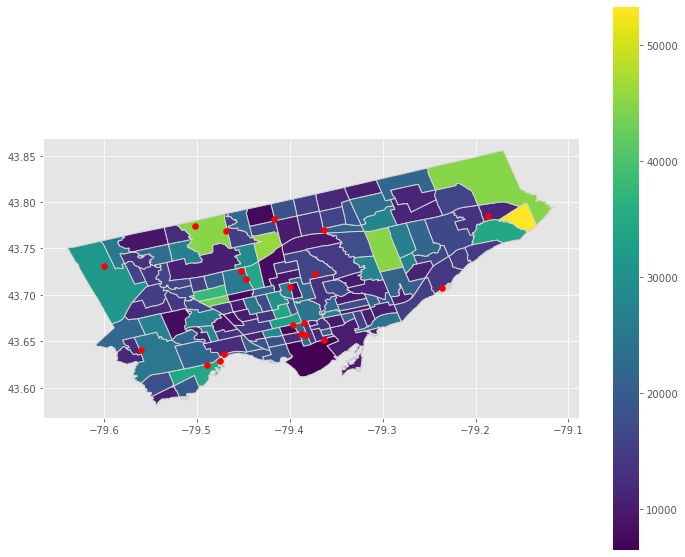

In [47]:
#demographc map for the entire city
ax=hoodDemo.plot(edgecolor='lightgrey',facecolor='whitesmoke',linewidth=1,figsize=(12,10),column='Total Population',legend=True)
top20Frequency.plot(ax=ax, color='red')

In [48]:
#Filter the neighbourhoods with the top 20 parking infraction by frequency
joined = geopandas.sjoin(hoodDemo,top20Frequency,op='intersects',how='left')


In [49]:
#Select only rows with values in the right_index column name
joined=joined[joined['index_right'].notna()]

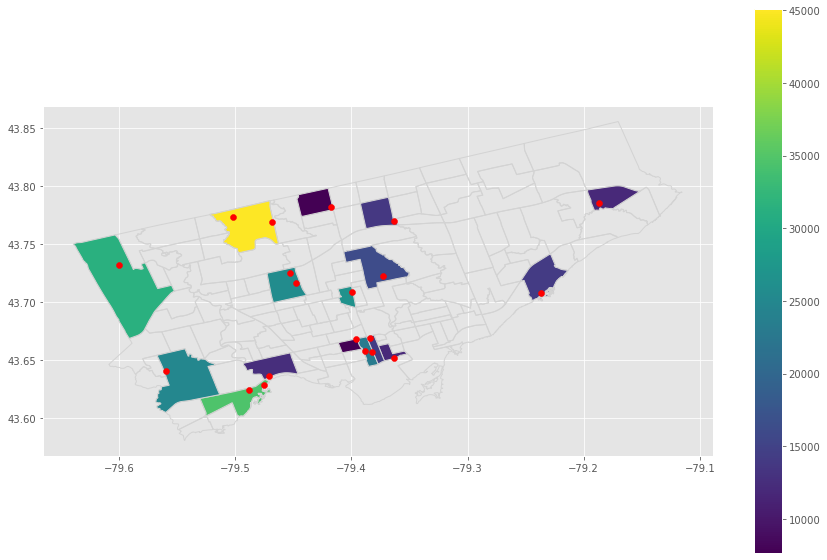

In [50]:
ax=hoodDemo.plot(edgecolor='lightgrey',facecolor='none',linewidth=1,figsize=(15,10))
joined.plot(ax=ax,column='Total Population',edgecolor='lightgrey',linewidth=1,figsize=(15,10),legend=True)
top20Frequency.plot(ax=ax, color='red')

In [51]:
#Compute Statistical Data for Population
AvePopTotal=hoodDemo['Total Population'].mean()
AvePopTotal=round(AvePopTotal,1)
AvePopTop20 =joined["Total Population"].mean()
AvePopTop20=round(AvePopTop20,1)

In [52]:
'The Ave. Population for all Neighbourhoods is {} While the Average Population for Top 20 Infraction Neighbourhood is {}'.format(AvePopTotal,AvePopTop20)

'The Ave. Population for all Neighbourhoods is 18676.9 While the Average Population for Top 20 Infraction Neighbourhood is 22496.2'

In [53]:
#Compute Statistical Data for Income
MedianIncome=hoodDemo['  Median household total income $'].mean()
MedianIncome=round(MedianIncome,1)
#MedianIncome
MedianIncomeTop20=joined['  Median household total income $'].mean()
MedianIncomeTop20=round(MedianIncomeTop20,1)
#MedianIncomeTop20

In [54]:
'The Median Income for the city per neighbourhood is {} while the top 20 is {}'.format(MedianIncome,MedianIncomeTop20)

'The Median Income for the city per neighbourhood is 62730.5 while the top 20 is 58269.4'

The top 20 infraction neighbourhoods have higher Population and Lower Income as compared to the entire City.